# Exploratory Data Analysis

In [1]:
from zipfile import ZipFile
import json
import os
from collections import Counter
import matplotlib.pyplot as plt
import re
from random import sample, choice
import numpy as np
import pandas as pd

## The Data

CUAD: An Expert-Annotated NLP Dataset for Legal Contract Review

https://arxiv.org/abs/2103.06268

This code is an adaptation of the scrape.py file avaliable on the github repository for CUAD.  It has been adapted to run in Jypter notebooks and allow us to step throght the coding line by line.`

### Download repository and extract data

In [2]:
def extract_zip(pth,data_pth = None):
    """Function to extract contents of a zip file to a specified location (wd if data_pth not passed)"""
    with ZipFile(pth, 'r') as zipObj:
       # Extract all the contents of zip file in different directory
       zipObj.extractall(data_pth)

In [3]:
#Download CUAD git repository
if not os.path.exists('main.zip'):
  !wget --no-check-certificate https://github.com/TheAtticusProject/cuad/archive/refs/heads/main.zip
  !unzip -q main.zip

#If it has not already been extracted, extract the contents of data.zip
if not os.path.exists('cuad-main/data'):
  os.makedirs('cuad-main/data')

if not os.path.exists('cuad-main/data/CUADv1.json'):
  extract_zip('cuad-main/data.zip','cuad-main/data/')



In [4]:
#Download a manualy curated set of labels for the full CUAD data. 
if not os.path.exists('labels3.txt'):
  !wget https://raw.githubusercontent.com/RichardMWarburton/ExploringCUAD/Exporatory-Analysis/labels3.txt

### Load CUADv1.json data

In [5]:
#Load CUADv1 JSON to data
with open('cuad-main/data/CUADv1.json','r') as infile:
    for line in infile:
        contract_data = json.loads(line)

#### Examples of data within the data dictionary

In [6]:
print('The data JSON has the following keys:\n\n',contract_data.keys())

The data JSON has the following keys:

 dict_keys(['version', 'data'])


The version key contains a single text reference outlining the version of the data

In [7]:
print('Version of data:', contract_data['version'])

Version of data: aok_v1.0


The data key contains a subsequent dictionary for each contract in the data set

In [8]:
print('There are {} data points in the \'data\' key inf the contract_data dictionary'.format(len(contract_data['data'])))

There are 510 data points in the 'data' key inf the contract_data dictionary


Each data point consits of a dictioary with two keys

In [9]:
#Choose random datapoint / contract
num_contracts = len(contract_data['data'])
m = choice(range(num_contracts))

print(contract_data['data'][m].keys())

dict_keys(['title', 'paragraphs'])


Title consists of a single string outlining the title of the data point

In [10]:
print('Title of data point {}:'.format(m).upper(),contract_data['data'][m]['title'])

TITLE OF DATA POINT 8: DovaPharmaceuticalsInc_20181108_10-Q_EX-10.2_11414857_EX-10.2_Promotion Agreement


The 'paragraphs' key contains a list with a single item.

In [11]:
print('Summary of paragraphs key for data point {}:\n'.format(m))
print('Data type of \'paragraphs\' key:'.upper(),type(contract_data['data'][m]['paragraphs']))
print('Length type of \'paragraphs\' key:'.upper(),len(contract_data['data'][m]['paragraphs']))

Summary of paragraphs key for data point 8:

DATA TYPE OF 'PARAGRAPHS' KEY: <class 'list'>
LENGTH TYPE OF 'PARAGRAPHS' KEY: 1


For rigour, it can be quickly shown that the paragraph keys across all data points have length 1

In [12]:
#Initate counter dictionary to store lengths of paragraph key
len_count = Counter()

#For each data point
for i in range(num_contracts):
  #determine the length of the paragrah key and increment respective counter
  len_count[len(contract_data['data'][i]['paragraphs'])]+=1

#Output Count analysis
print(len_count)

Counter({1: 510})


This list contains a single data point, which is a dictionary consisting of two keys

In [13]:
print('Data type:'.upper(), type(contract_data['data'][m]['paragraphs'][0]))
print(('Keys in paragraphs:'.upper(),contract_data['data'][m]['paragraphs'][0].keys()))

DATA TYPE: <class 'dict'>
('KEYS IN PARAGRAPHS:', dict_keys(['qas', 'context']))


The 'Context' key appears to hold the full text data for the contract parsed in to a clean format

In [52]:
#Output first 2500 characters of context
contract_data['data'][m]['paragraphs'][0]['context'][:2500]

'Exhibit 10.2\n\n______________________________________________________________________________\n\nCO-PROMOTION AGREEMENT\n\nby and between\n\nDOVA PHARMACEUTICALS, INC.\n\nand\n\nVALEANT PHARMACEUTICALS NORTH AMERICA LLC\n\nSeptember 26, 2018\n\n______________________________________________________________________________\n\nCONFIDENTIAL TREATMENT HAS BEEN REQUESTED FOR PORTIONS OF THIS EXHIBIT. THE COPY FILED HEREWITH OMITS THE INFORMATION SUBJECT TO A CONFIDENTIALITY REQUEST. OMISSIONS ARE DESIGNATED [***]. A COMPLETE VERSION OF THIS EXHIBIT HAS BEEN FILED SEPARATELY WITH THE SECURITIES AND EXCHANGE COMMISSION.\n\nSource: DOVA PHARMACEUTICALS INC., 10-Q, 11/8/2018\n\n\n\n\n\nTABLE OF CONTENTS\n\nPage\n\nARTICLE 1 DEFINITIONS 1\n\nARTICLE 2 RIGHTS AND OBLIGATIONS 8\n\n2.1 Engagement; Grant of Rights. 8\n\n2.2 Retention of Rights. 9\n\n2.3 Non-Competition; Non-Solicitation. 9\n\n2.4 Dova Trademarks and Copyrights. 10\n\nARTICLE 3 JOINT STEERING COMMITTEE 11\n\n3.1 Formation of the JS

In [14]:
for key in contract_data['data'][m]['paragraphs'][0]:
  print('Data type of {}:'.format(key).upper(),type(contract_data['data'][m]['paragraphs'][0][key]))

DATA TYPE OF QAS: <class 'list'>
DATA TYPE OF CONTEXT: <class 'str'>


In [15]:
print('There are {} items in the \'qas\' list in the data dictionary'.format(len(contract_data['data'][m]['paragraphs'][0]['qas'])))

There are 41 items in the 'qas' list in the data dictionary


It can be easily shown that each data point has 41 items in the 'qas' key. 

In [16]:
#Initate counter dictionary to store lengths of paragraph key
item_count = Counter()

#For each data point
for i in range(num_contracts):
  #determine the length of the paragrah key and increment respective counter
  item_count[len(contract_data['data'][i]['paragraphs'][0]['qas'])]+=1

#Output Count analysis
print(item_count)

Counter({41: 510})


This is the total number of labels to be expected.  As we are not expecting to find all of the lables in each of the contracts, there will be an additional dat apoint indicating if the label is found  

In [17]:
num_clauses = 41
n = 1#choice(range(num_clauses))

print('An example of clause {} in contract data point {}:\n'.format(*(n,m)))

for key in contract_data['data'][m]['paragraphs'][0]['qas'][n]:
  print(key.upper()+':',contract_data['data'][m]['paragraphs'][0]['qas'][n][key])

An example of clause 1 in contract data point 8:

ANSWERS: [{'text': 'Valeant', 'answer_start': 1131}, {'text': 'Dova Pharmaceuticals, Inc.', 'answer_start': 4972}, {'text': 'Dova', 'answer_start': 857}, {'text': 'Dova and Valeant are each referred to individually as a "Party" and together as the "Parties".', 'answer_start': 5130}, {'text': 'Valeant Pharmaceuticals North America LLC', 'answer_start': 5037}]
ID: DovaPharmaceuticalsInc_20181108_10-Q_EX-10.2_11414857_EX-10.2_Promotion Agreement__Parties
QUESTION: Highlight the parts (if any) of this contract related to "Parties" that should be reviewed by a lawyer. Details: The two or more parties who signed the contract
IS_IMPOSSIBLE: False


We see that the 'is_possible' field provides a True/False view of the clause being found.  This will allow us to reconsice the number of clauses in the data vs. the published paper

In [18]:
#Initate Counter
clause_counter = Counter()

for i in range(num_contracts):
  for j in range(num_clauses):
    clause_counter[contract_data['data'][i]['paragraphs'][0]['qas'][j]['is_impossible']] +=1

print(clause_counter)

Counter({True: 14208, False: 6702})


This count falls short of the 13101 expected in the paper.  Investigating the 'answers' key we can see that it is possible for there to be multiple answers to eash question (i.e. pultiple labels per clause per contract)

In [19]:
contract_data['data'][m]['paragraphs'][0]['qas'][n]['answers']

[{'answer_start': 1131, 'text': 'Valeant'},
 {'answer_start': 4972, 'text': 'Dova Pharmaceuticals, Inc.'},
 {'answer_start': 857, 'text': 'Dova'},
 {'answer_start': 5130,
  'text': 'Dova and Valeant are each referred to individually as a "Party" and together as the "Parties".'},
 {'answer_start': 5037, 'text': 'Valeant Pharmaceuticals North America LLC'}]

Allowing for this in the count code, we get:

In [20]:
#Initate Counter
clause_counter = Counter()

for i in range(num_contracts):
  for j in range(num_clauses):
    for k in range(len(contract_data['data'][i]['paragraphs'][0]['qas'][j]['answers'])):
      clause_counter[contract_data['data'][i]['paragraphs'][0]['qas'][j]['is_impossible']] +=1

print(clause_counter)

Counter({False: 13823})


This total is closer to the expected total of 13,101 from the paper.  We will procede with the total from this analysis, howeve caution will be taken as there may be underlying issues for the discrepency that need adressing

**NOTE**: as k = 0 if no clauses are found, the above will not count the impossible labels

In [21]:
print('An example of clause {} in contract data point {}:\n'.format(*(n,m)))

for key in contract_data['data'][m]['paragraphs'][0]['qas'][n]:
  print(key.upper()+':',contract_data['data'][m]['paragraphs'][0]['qas'][n][key])

An example of clause 1 in contract data point 8:

ANSWERS: [{'text': 'Valeant', 'answer_start': 1131}, {'text': 'Dova Pharmaceuticals, Inc.', 'answer_start': 4972}, {'text': 'Dova', 'answer_start': 857}, {'text': 'Dova and Valeant are each referred to individually as a "Party" and together as the "Parties".', 'answer_start': 5130}, {'text': 'Valeant Pharmaceuticals North America LLC', 'answer_start': 5037}]
ID: DovaPharmaceuticalsInc_20181108_10-Q_EX-10.2_11414857_EX-10.2_Promotion Agreement__Parties
QUESTION: Highlight the parts (if any) of this contract related to "Parties" that should be reviewed by a lawyer. Details: The two or more parties who signed the contract
IS_IMPOSSIBLE: False


The 'question' key provides a view of the question posed to the laywer for annotation

In [22]:
print(contract_data['data'][m]['paragraphs'][0]['qas'][n]['question'])

Highlight the parts (if any) of this contract related to "Parties" that should be reviewed by a lawyer. Details: The two or more parties who signed the contract


The 'id' key provides a concatenation of the contract title and the clause in question

In [23]:
print(contract_data['data'][m]['paragraphs'][0]['qas'][n]['id'])

DovaPharmaceuticalsInc_20181108_10-Q_EX-10.2_11414857_EX-10.2_Promotion Agreement__Parties


This can easily be split by noting that a double underscore '__' seperates the values

In [24]:
print(contract_data['data'][m]['paragraphs'][0]['qas'][n]['id'].split(sep='__'))

['DovaPharmaceuticalsInc_20181108_10-Q_EX-10.2_11414857_EX-10.2_Promotion Agreement', 'Parties']


The answers key consistso of a list of dictionaries.  If a clause is found in the contract the respective annotation will be added to this list.  If multiple annotations are made, the list will have a legnth > 1

**NOTE:** If no clauses are found, this will have length = 0

In [32]:
print('Data Type:'.upper(),type(contract_data['data'][m]['paragraphs'][0]['qas'][n]['answers']))
print('Data length:'.upper(),len(contract_data['data'][m]['paragraphs'][0]['qas'][n]['answers']))

DATA TYPE: <class 'list'>
DATA LENGTH: 5


Each entry in this list (if one exists) consists of a dictioary with two keys

In [35]:
print(type(contract_data['data'][m]['paragraphs'][0]['qas'][n]['answers'][0]))
print(contract_data['data'][m]['paragraphs'][0]['qas'][n]['answers'][0].keys())

<class 'dict'>
dict_keys(['text', 'answer_start'])


In [39]:
for key in contract_data['data'][m]['paragraphs'][0]['qas'][n]['answers'][0].keys():
  print(key.upper() + ':',contract_data['data'][m]['paragraphs'][0]['qas'][n]['answers'][0][key])

TEXT: Valeant
ANSWER_START: 1131


The 'text' key provides the annotated text extracted from the contract and the 'answer_start' key, the character start point in the 'context' data outlined above.  

The code below demonstrates that the text field above can be parsed from the context data using the answer_start data.  

In [50]:
#Define start and end point for annotation in context data
extract_len = len(contract_data['data'][m]['paragraphs'][0]['qas'][n]['answers'][0]['text'])
extract_start = contract_data['data'][m]['paragraphs'][0]['qas'][n]['answers'][0]['answer_start']
extract_end = extract_start + extract_len

#Obtain the context data for the specific contract
contract_context = contract_data['data'][m]['paragraphs'][0]['context']

#Output the parsed string from the context
contract_context[extract_start:extract_end]

'Valeant'

In [76]:
num_contracts = len(data['data'])

#Select a contract at random
rnd_rng = sample(range(num_contracts),5)

for m in rnd_rng:
  print('Index {}\n'.format(m))
  for key in data['data'][m]['paragraphs'][0]['qas'][0].keys():
    print(key.upper() +':',data['data'][m]['paragraphs'][0]['qas'][0][key])
  print('length of \'paragraphs\' key:', len(data['data'][m]['paragraphs']))
  print('length of \'qas\' key:', len(data['data'][m]['paragraphs']))
  print('\n')


Index 210

ANSWERS: [{'text': 'Master Services Agreement', 'answer_start': 45}]
ID: KUBIENT,INC_07_02_2020-EX-10.14-MASTER SERVICES AGREEMENT_Part1__Document Name
QUESTION: Highlight the parts (if any) of this contract related to "Document Name" that should be reviewed by a lawyer. Details: The name of the contract
IS_IMPOSSIBLE: False
length of 'paragraphs' key: 1
length of 'qas' key: 1


Index 407

ANSWERS: [{'text': 'Strategic Alliance Agreement', 'answer_start': 62}]
ID: COOLTECHNOLOGIES,INC_10_25_2017-EX-10.71-Strategic Alliance Agreement__Document Name
QUESTION: Highlight the parts (if any) of this contract related to "Document Name" that should be reviewed by a lawyer. Details: The name of the contract
IS_IMPOSSIBLE: False
length of 'paragraphs' key: 1
length of 'qas' key: 1


Index 227

ANSWERS: [{'text': 'Sponsorship Agreement', 'answer_start': 86}]
ID: CANOPETROLEUM,INC_12_13_2007-EX-10.1-Sponsorship Agreement__Document Name
QUESTION: Highlight the parts (if any) of this cont

In [84]:
data['data'][30].keys()

data['data'][30]['title']

'PfHospitalityGroupInc_20150923_10-12G_EX-10.1_9266710_EX-10.1_Franchise Agreement1'

In [30]:
# Print out the m'th example form the data
m = 5
for key in data['data'][m]['paragraphs'][0]['qas'][0].keys():
  print(key.upper() +':',data['data'][m]['paragraphs'][0]['qas'][0][key])

ANSWERS: [{'text': 'ENDORSEMENT AGREEMENT', 'answer_start': 171}]
ID: ADAMSGOLFINC_03_21_2005-EX-10.17-ENDORSEMENT AGREEMENT__Document Name
QUESTION: Highlight the parts (if any) of this contract related to "Document Name" that should be reviewed by a lawyer. Details: The name of the contract
IS_IMPOSSIBLE: False


In [35]:
data['data'][1]['paragraphs'][0]['qas'][0]

{'answers': [{'answer_start': 307,
   'text': 'Promotion and Distribution Agreement'}],
 'id': 'WHITESMOKE,INC_11_08_2011-EX-10.26-PROMOTION AND DISTRIBUTION AGREEMENT__Document Name',
 'is_impossible': False,
 'question': 'Highlight the parts (if any) of this contract related to "Document Name" that should be reviewed by a lawyer. Details: The name of the contract'}

print('Is_Possible:',data['data'][0]['paragraphs'][0]['qas'][0]

In [10]:
#Determine number of contracts within the data dictionary
contracts = len(data['data'])
print('There are {} contracts in the data set'.format(contracts))

There are 510 contracts in the data set


#### Explore the responses within the data

In [11]:
#Initate lists to store responses
titles =[]
paragraph_len = []
qas_len = []
clause = []
clause_found = []

#For each contract in the data
for i in range(contracts):
    #Append the title to titles
    titles.append(data['data'][i]['title'])
    
    #Append the length of the paragraph key to the data to paragraph_len
    paragraph_len.append(len(data['data'][i]['paragraphs']))
    
    #Append the number of clauses investigated for each contract to qas_len
    qas_len.append(len(data['data'][i]['paragraphs'][0]['qas']))
    
    #Initate lists for the contract to capture clauses investigated and if responses found in contract
    contract_clause= []
    contract_clause_found = []
    
    #For each clause investigated in contract
    for j in range(len(data['data'][i]['paragraphs'][0]['qas'])):
        
        #Extract the specific clause from the question key using regex (clause always "quoted")
        q_text = data['data'][i]['paragraphs'][0]['qas'][j]['question']
        #Append clause to contract_clause list
        contract_clause.append(re.search(r'"(.*?)"', q_text)[0].replace('"',''))
        
        #Identify if clause found in cotnract and append to contract_clause_found list
        contract_clause_found.append(data['data'][i]['paragraphs'][0]['qas'][j]['is_impossible'])
    
    #Append overal conract lists to clause and clause found lists (list within a list)
    clause.append(contract_clause)
    clause_found.append(contract_clause_found)
    
#Define function to flatten a list
flatten = lambda t: [item for sublist in t for item in sublist]

#Count total responses
responded = Counter(flatten(clause_found))

#To simplify analysis convert clause and clause_found to np.arrays
clause = np.array(clause)
clause_found = np.array(clause_found)

In [12]:
#Initate lists to store the specific clauses found and totals
clauses_found = []
clauses_found_num = []

#For each contract, produce lists of the specific clauses and total number found
for j in range(contracts):
    clauses_found.append(clause[j][clause_found[j]])
    clauses_found_num.append(len(clause[j][clause_found[j]]))

In [13]:
#Output Summary Analysis
print('Each contract has minimum of {} questions answered'.format(min(qas_len)))
print('Each contract has maximum of {} questions answered'.format(max(qas_len)))
print('Of the {} questions asked in total, {} have had responses found'.format(*(contracts*max(qas_len),responded[False])))

Each contract has minimum of 41 questions answered
Each contract has maximum of 41 questions answered
Of the 20910 questions asked in total, 6702 have had responses found


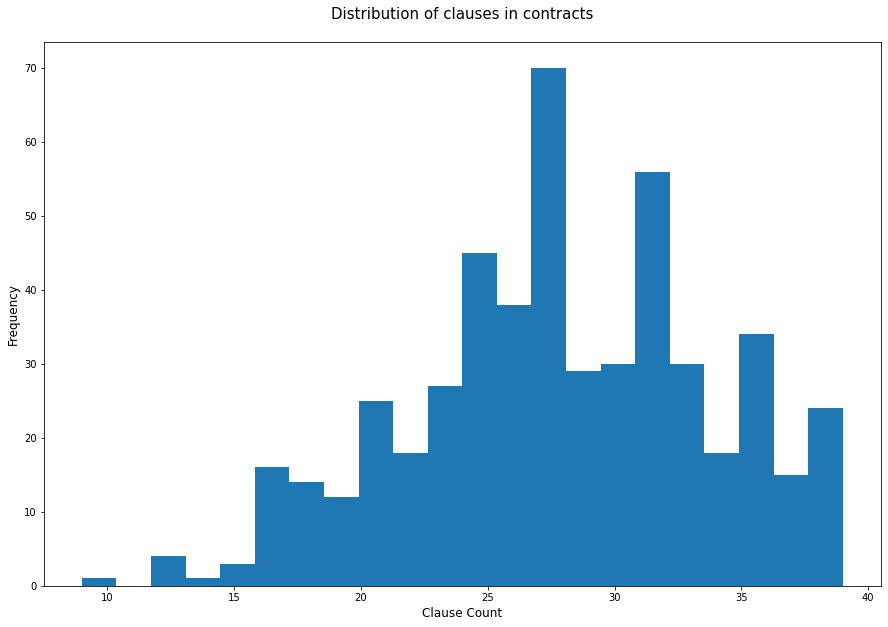

In [14]:
plt.figure(figsize=(15,10))
plt.title('Distribution of clauses in contracts\n',size = 15)
plt.hist(clauses_found_num,bins=22)
plt.xlabel('Clause Count',size = 12)
plt.ylabel('Frequency',size = 12)
plt.show()

#### Labeling Data

A manual mapping exercise has been completed to map the contract title to one of the know contract classes.  In most cases a direct mapping can be made.  in c80% of cases a decision has been made by the labeller regarding where to best map the data.

This shows that with minimal intervention, Figure 3 can be recovered from the CUAD data

In [15]:
#Correct for a single identified edgecase in the data
titles = [x.replace('É','E') for x in titles]

#Read in and build a mapping from titles to label
label_LU = {}

with open('labels3.txt','r') as infile:
    for line in infile:
        label_data = line.strip().replace('"','').split(sep='\t')
        label_LU[(label_data[0])] = label_data[1]
        
#label data with imported labels
labels = [label_LU[x] for x in titles]

In [16]:
#Output count analysis of labels
label_counts = Counter(labels)
pd.DataFrame(label_counts.values(),index=label_counts.keys(),columns=['counts'])

,counts
distributor agreement,32
promotion agreement,12
supply agreement,18
hosting agreement,20
joint venture agreement,23
endorsement agreement,24
consulting agreement,11
marketing agreement,17
strategic alliance agreement,32
sponsorship agreement,31


## Build Labled Data Of Annotations

In [ ]:
from collections import defaultdict

In [ ]:
contract_data =defaultdict(list)
check_count = 0
#For each contract in the data
for i in range(contracts):
    c_title = titles[i]
    c_label = labels[i] 
    
    for j in range(len(data['data'][i]['paragraphs'][0]['qas'])):
        
        q_text = data['data'][i]['paragraphs'][0]['qas'][j]['question']
        c_clause = re.search(r'"(.*?)"', q_text)[0].replace('"','')
        
        if not data['data'][i]['paragraphs'][0]['qas'][j]['is_impossible']:
            check_count += 1
        
            for k in range(len(data['data'][i]['paragraphs'][0]['qas'][j]['answers'])):

                c_text = data['data'][i]['paragraphs'][0]['qas'][j]['answers'][k]['text']
                
                contract_data['contract'].append(c_title)
                contract_data['type'].append(c_label)
                contract_data['clause'].append(c_clause)
                contract_data['text'].append(str(c_text))

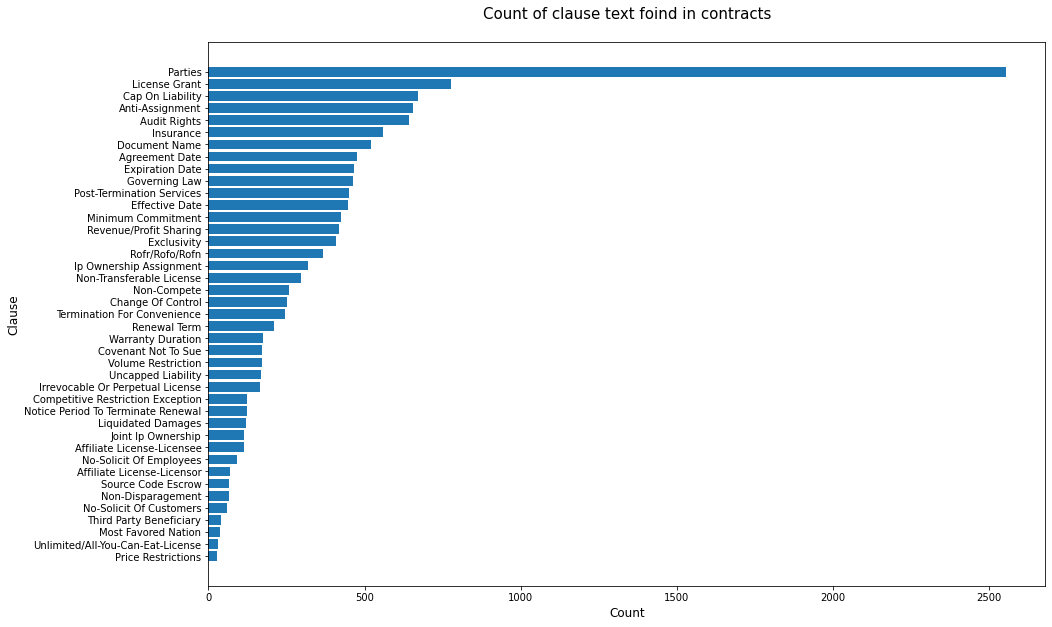

In [ ]:
#Build dataframe of clause data
clause_data = pd.DataFrame(contract_data)

#determine counts of clauses and sort by count results
cl, cl_count = np.unique(clause_data['clause'],return_counts=True)
idx = np.argsort(cl_count)
cl, cl_count = cl[idx],cl_count[idx] 

#Plot sorted count volumes
plt.figure(figsize=(15,10))
plt.barh(cl, cl_count)
plt.title('Count of clause text foind in contracts\n',size = 15)
plt.xlabel('Count',size = 12)
plt.ylabel('Clause',size = 12)
plt.show()